# Librerías

In [5]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img, save_img

In [5]:
def contar_imagenes(ruta):
    for categoria in os.listdir(ruta):
        path = os.path.join(ruta, categoria)
        count = len([nombre for nombre in os.listdir(path) if os.path.isfile(os.path.join(path, nombre))])
        print(f'{categoria}: {count}')

ruta_train = 'data_split/train'
ruta_val = 'data_split/val'
ruta_test = 'data_split/test'

print("Entrenamiento:")
contar_imagenes(ruta_train)

print("\nValidación:")
contar_imagenes(ruta_val)

print("\nPrueba:")
contar_imagenes(ruta_test)

Entrenamiento:
HSIL: 1089
LSIL: 870
Negative: 4338
ASC-H: 592
ASC-US: 387
SCC: 102

Validación:
HSIL: 273
LSIL: 218
Negative: 1085
ASC-H: 148
ASC-US: 97
SCC: 26

Prueba:
HSIL: 341
LSIL: 272
Negative: 1356
ASC-H: 185
ASC-US: 122
SCC: 33


# SMOTE

**Paso 1: Preparar y Visualizar la Distribución de Clases Original**

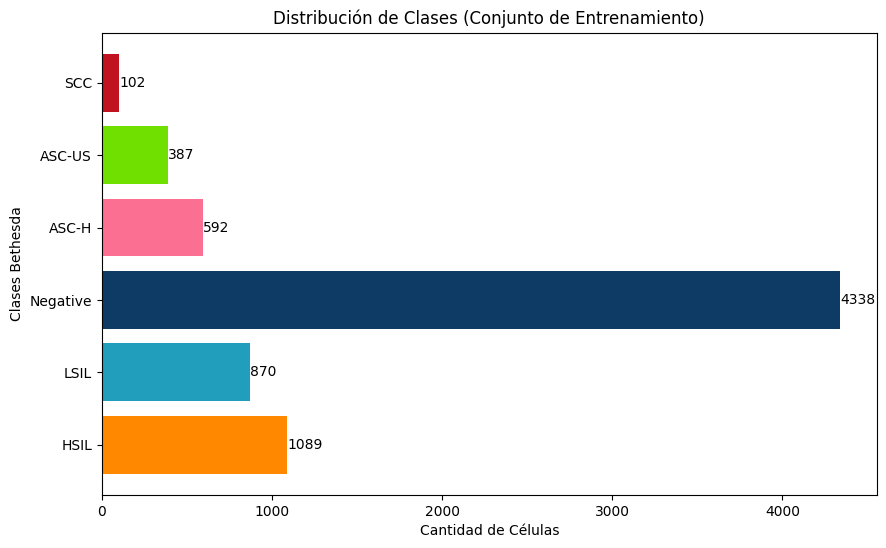

In [4]:
# Contar la cantidad de imágenes por clase en el conjunto de entrenamiento
class_counts = Counter([folder for folder in os.listdir('data_split/train') for _ in os.listdir(os.path.join('data_split/train', folder))])
classes, counts = zip(*class_counts.items())

# Colores asignados a cada clase Bethesda, con un color por defecto (gris) para clases no asignadas
class_colors = {
    'SCC': '#c1121f',  # Rojo
    'ASC-US': '#70e000',  # Verde
    'LSIL': '#219ebc',  # Celeste
    'HSIL': '#ff8800',  # Naranja
    'Negative': '#0d3b66',  # Negro
    'ASC-H': '#fb6f92'  # Rosa
}

# Preparar los datos para el gráfico de barras
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Asignar colores a cada barra según la clase o un color por defecto si no existe en el diccionario
colors = [class_colors.get(label, '#cccccc') for label in labels]  # Gris claro por defecto

# Gráfico de Barras Horizontal con colores personalizados
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sizes, color=colors)

# Añadir el número de células dentro de cada barra
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,  # Posición
             str(size),  # Texto (número de células)
             va='center', ha='left', fontsize=10)  # Alineación vertical y horizontal

plt.title('Distribución de Clases Antes del Balanceo (SMOTE)')
plt.xlabel('Cantidad de Células')
plt.ylabel('Clases Bethesda')
plt.show()

**Paso 2: Generación de Imágenes con SMOTE Adaptado para Imágenes**

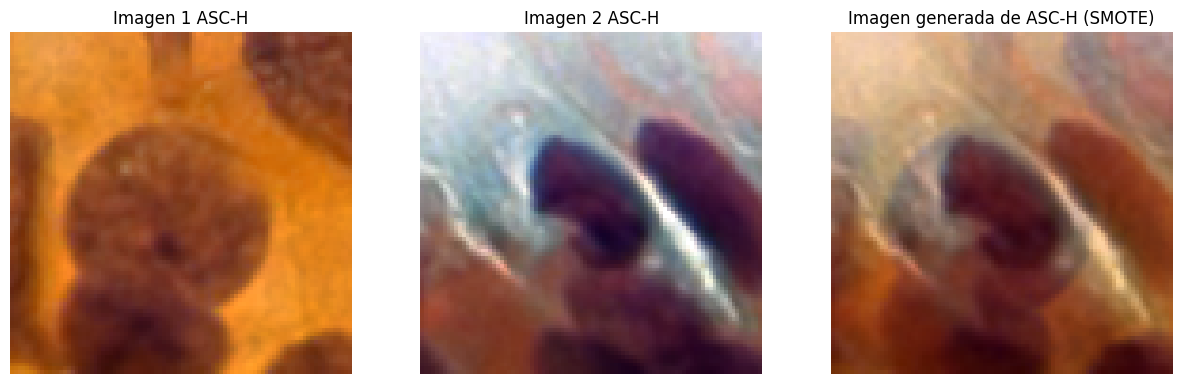

In [40]:
# Definir la función SMOTE adaptada para imágenes
def smote_image(image1, image2):
    alpha = np.random.rand()  # Factor de interpolación aleatorio
    return alpha * image1 + (1 - alpha) * image2

def apply_smote_to_class(class_dir, num_samples_to_generate, class_name, visualize=False):
    image_files = os.listdir(class_dir)
    images = [img_to_array(load_img(os.path.join(class_dir, img))) for img in image_files]
    
    if len(images) < 2:
        print(f"No hay suficientes imágenes en la clase {class_name} para aplicar SMOTE.")
        return
    
    for idx in range(num_samples_to_generate):
        # Selección aleatoria de dos imágenes base
        img1_idx, img2_idx = np.random.choice(len(images), 2, replace=False)
        img1, img2 = images[img1_idx], images[img2_idx]
        
        # Generar nueva imagen sintética
        new_image = smote_image(img1, img2)
        
        # Guardar la imagen generada
        new_image_path = os.path.join(class_dir, f"smote_{idx}.png")
        save_img(new_image_path, new_image.astype(np.uint8))
        
        # Mostrar un ejemplo de las imágenes originales y la imagen generada si visualize es True
        if visualize and idx == 0:  # Muestra solo la primera para no sobrecargar
            fig, axes = plt.subplots(1, 3, figsize=(15, 5))
            axes[0].imshow(array_to_img(img1))
            axes[0].set_title(f"Imagen 1 {class_name}")
            axes[1].imshow(array_to_img(img2))
            axes[1].set_title(f"Imagen 2 {class_name}")
            axes[2].imshow(array_to_img(new_image))
            axes[2].set_title(f"Imagen generada de {class_name} (SMOTE)")
            for ax in axes:
                ax.axis("off")
            plt.show()
            break  # Solo muestra el primer par para no saturar la salida

# Aplicar SMOTE a una clase minoritaria y visualizar
class_path = 'data_split/train/ASC-H'  # Ruta a la clase que quieres mostrar
class_name = "ASC-H"  # Nombre de la clase para las etiquetas
target_samples = 650  # Número objetivo de imágenes por clase

current_count = len(os.listdir(class_path))
num_samples_to_generate = max(0, target_samples - current_count)
apply_smote_to_class(class_path, num_samples_to_generate, class_name, visualize=True)

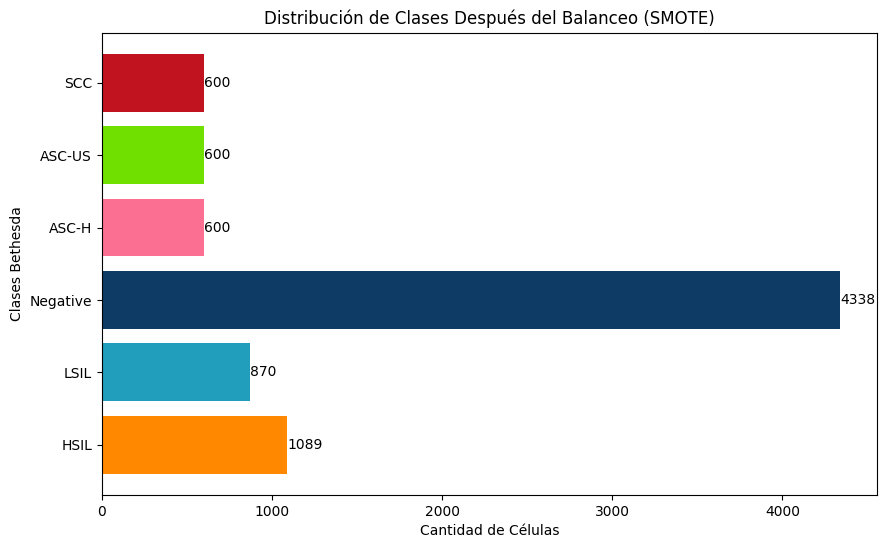

In [41]:
# Contar la cantidad de imágenes por clase en el conjunto de entrenamiento
class_counts = Counter([folder for folder in os.listdir('data_split/train') for _ in os.listdir(os.path.join('data_split/train', folder))])
classes, counts = zip(*class_counts.items())

# Colores asignados a cada clase Bethesda, con un color por defecto (gris) para clases no asignadas
class_colors = {
    'SCC': '#c1121f',  # Rojo
    'ASC-US': '#70e000',  # Verde
    'LSIL': '#219ebc',  # Celeste
    'HSIL': '#ff8800',  # Naranja
    'Negative': '#0d3b66',  # Negro
    'ASC-H': '#fb6f92'  # Rosa
}

# Preparar los datos para el gráfico de barras
labels = list(class_counts.keys())
sizes = list(class_counts.values())

# Asignar colores a cada barra según la clase o un color por defecto si no existe en el diccionario
colors = [class_colors.get(label, '#cccccc') for label in labels]  # Gris claro por defecto

# Gráfico de Barras Horizontal con colores personalizados
plt.figure(figsize=(10, 6))
bars = plt.barh(labels, sizes, color=colors)

# Añadir el número de células dentro de cada barra
for bar, size in zip(bars, sizes):
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2,  # Posición
             str(size),  # Texto (número de células)
             va='center', ha='left', fontsize=10)  # Alineación vertical y horizontal

plt.title('Distribución de Clases Después del Balanceo (SMOTE)')
plt.xlabel('Cantidad de Células')
plt.ylabel('Clases Bethesda')
plt.show()